# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [96]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [97]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [98]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [99]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [133]:
#turn loan status into binary 
modified=df
modified['Loan_Status']=df['Loan_Status'].apply(lambda x: 0 if x=="N" else 1 )
#calculate the mean
modified.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot:xlabel='ApplicantIncome'>

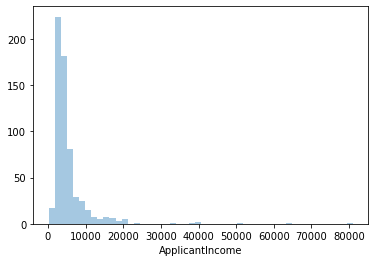

In [134]:
sns.distplot(df.ApplicantIncome,kde=False)


Look at box plots to understand the distributions. 

<AxesSubplot:xlabel='ApplicantIncome'>

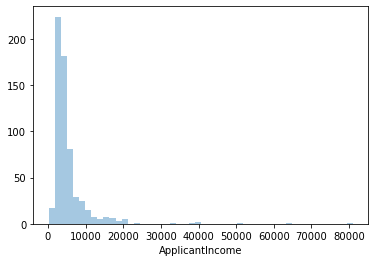

In [135]:
sns.distplot(df.ApplicantIncome.dropna(),kde=False)

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

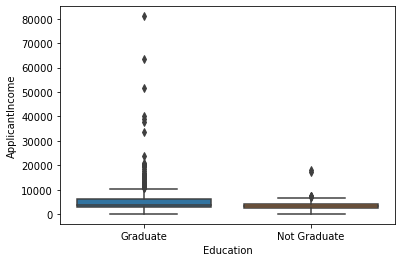

In [136]:
sns.boxplot(x='Education',y='ApplicantIncome',data=df)

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

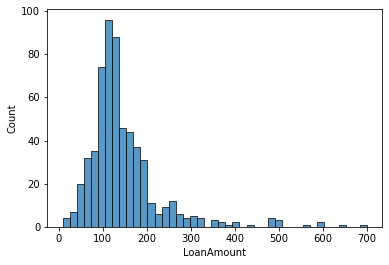

In [137]:
sns.histplot(x='LoanAmount', data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

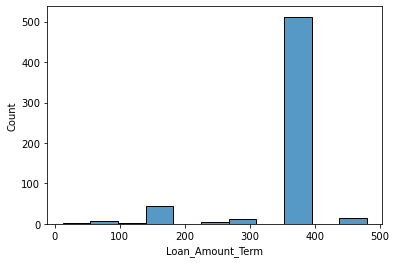

In [138]:
sns.histplot(x='Loan_Amount_Term', data=df)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [120]:
#pd.DataFrame.pivot_table(df)

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [139]:
#impute missing values
#categorical
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

#numerical
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

In [217]:
#create TotalIncome column as a sum of ApplicantIncome and CoapplicantIncome
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [218]:
#create TotalIncome_log column as a log of TotalIncome
df['TotalIncome_log']=np.log(df['TotalIncome'])

In [219]:
#create LoanAmount_log column
df['LoanAmount_log']=np.log(df['LoanAmount'])

In [220]:
df.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount', 'TotalIncome'],inplace=True)

In [221]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,8.674026,NaN
1,LP001003,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,8.714568,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,8.505323,4.787492
4,LP001008,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,8.699515,4.948760


### DATA CLEANING WITH PIPELINES

In [176]:
from sklearn.base import BaseEstimator, TransformerMixin

class LogDfTransform(BaseEstimator, TransformerMixin):
    def __init__(self, columnNames):
        self.columnNames = columnNames
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X=X.copy()
        X.loc[:,self.columnNames]=np.log(X[self.columnNames]).values
        return X
    
income_log = LogDfTransform(['ApplicantIncome', 'LoanAmount'])

In [222]:
# import libraries for our pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest

# create pipelines for numerical and categorical columns
# pipeline for numerical columns (log transform -> imputation -> standard scaler -> selectkbest)
numerical_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')),
                                ('scaling', StandardScaler()),
                                ('select_kbest', SelectKBest(k=3))])

# pipeline for categorical columns
categorical_transform = Pipeline([('impute_mode', SimpleImputer(strategy='most_frequent')),
                                ('one-hot-encode', OneHotEncoder())])

# columntransformer for numerical and categorical columns
preprocessing_df = ColumnTransformer([('numerical', numerical_transform, ['TotalIncome_log', 'LoanAmount_log','Loan_Amount_Term','Credit_History']),
('categorical', categorical_transform, ['Gender', 'Married', 'Dependents', 'Education', 
'Self_Employed', 'Property_Area'])])

## 4. Building a Predictive Model

In [223]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [224]:
from sklearn.linear_model import LogisticRegression

# create a LogisticRegression classifier
logistic = LogisticRegression(max_iter=10000)

# build a pipeline for our model
pipeline = Pipeline([('preprocessing', preprocessing_df),
                    ('classifier', logistic)])

In [225]:
from sklearn.model_selection import train_test_split

#split data into training and test sets
X=df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y=df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Try paramater grid search to improve the results

In [151]:
from sklearn.model_selection import GridSearchCV

# find the best parameters for the model using GridSearchCV
param_grid = {'features__random_forest__max_depth': [5, 10, 15, 20, 25, 30],
                'features__random_forest__n_estimators': [100, 200, 300, 400, 500],
                'features__decision_tree__max_depth': [5, 10, 15, 20, 25, 30],
                'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# create gridsearch object
grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# fit grid search
grid.fit(X_train, y_train)

ValueError: Invalid parameter features for estimator Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['LoanAmount',
                                                   'TotalIncome']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', LogisticRegression())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [249]:
#fit the model
pipeline.fit(X_train, y_train)


# get accuracy score
print('Accuracy: ', accuracy_score(y_test, pipeline.predict(X_test)))

Accuracy:  0.7886178861788617


In [205]:
# Display HTML representation in a jupyter context
from sklearn import set_config
set_config(display='diagram')

pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                                  ('select_kbest',
                                                                   SelectKBest(k=3))]),
                                                  ['TotalIncome_log',
                                                   'LoanAmount_log',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [206]:
# Or, save the HTML to a file
from sklearn.utils import estimator_html_repr

with open('model_pipeline.html', 'w') as f:  
    f.write(estimator_html_repr(pipeline))

In [234]:
X_tester = X_test.iloc[[5]]
y_pred = pipeline.predict(X_tester)
print(type(X_tester))
print(y_pred)

<class 'pandas.core.frame.DataFrame'>
['Y']


In [239]:
X_tester.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome_log,LoanAmount_log
578,Male,Yes,1,Graduate,No,360.0,1.0,Rural,8.297544,4.672829


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [236]:
import pickle

In [ ]:

#store in pickle
pickle.dump(pipeline, open('model.pkl', 'wb'))

In [237]:

testmodel = pickle.load(open('model.pkl', 'rb'))

In [240]:
y_prpe = testmodel.predict(X_tester)

In [248]:
print(y_prpe[0])

Y


In [ ]:
url = 'ec2-52-14-229-23.us-east-2.compute.amazonaws.com:5000'
json_entry = {
    "Gender": "Male",
    "Married": "No",
    "Dependents": 1,
    "Education": "Graduate",
    "Self_Employed": "No",
    "ApplicantIncome": 2345,
    "CoapplicantIncome": 0,
    "LoanAmount": 128.0,
    "Loan_Amount_Term": 360.0,
    "Credit_History": 1.0,
    "Property_Area": "Urban"
}

import requests
res = requests.post(url, json=json_entry)
if res.ok:
    print(res.json())
